# TesiSquare Dataset Analysis

In [111]:
#We include all the libraries for the code
import pandas as pd  #2.2.3 Version
import numpy as np  #2.2.1 Version
import matplotlib.pyplot as plt  #3.10.0 Version
import seaborn as sns  #0.13.2 Version
import warnings  
from sklearn.impute import SimpleImputer  #1.6.1 Version
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error

In [112]:
dataset = pd.read_csv("cleaned_dataset.csv") #Opening the .csv file

## Correlations and Correlogram

#### We filter only the numeric columns to calculate the correlation matrix

In [113]:
#Select only numeric columns
numerical_dataset = dataset.select_dtypes(include=[np.number])

#We calculate the correlation matrix
correlation_matrix = numerical_dataset.corr()

#### Let's visualize the correlation matrix with a heatmap

Text(0.5, 1.0, 'Correlogram')

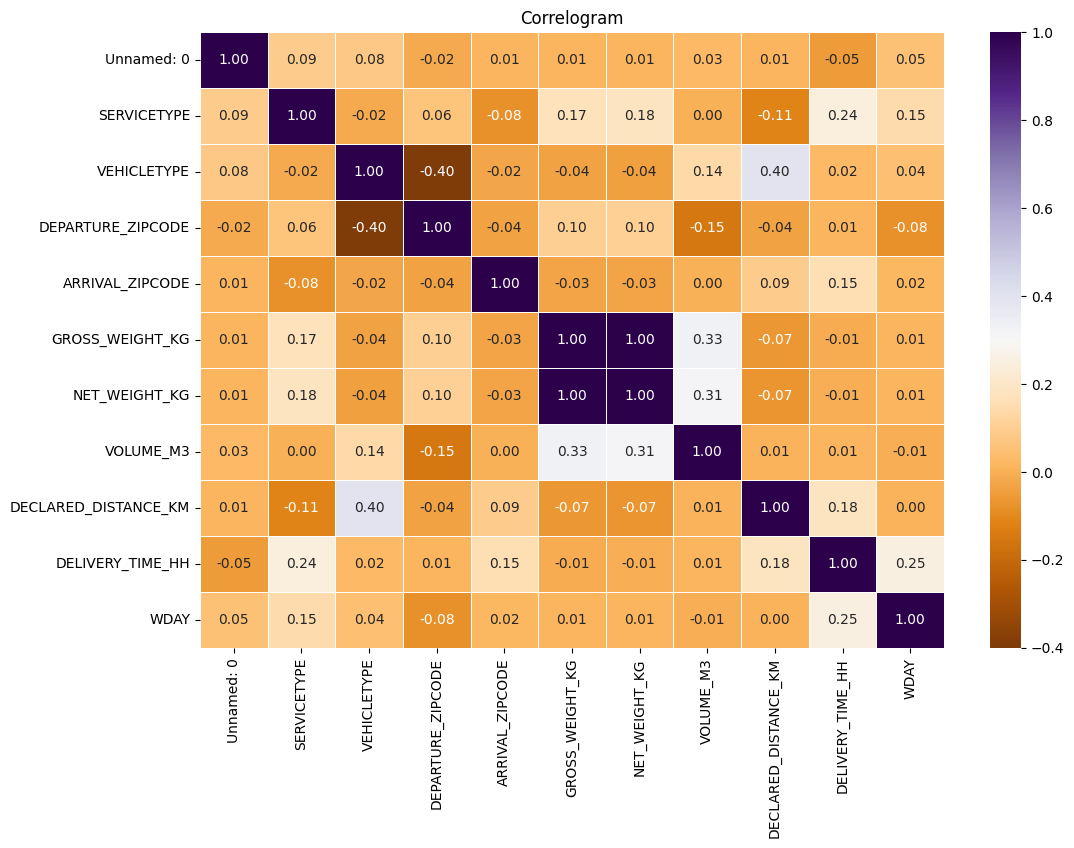

In [114]:
plt.figure(figsize=(12, 8))  # Set the size of the figure
sns.heatmap(correlation_matrix, annot=True, cmap="PuOr", fmt=".2f", linewidths=0.5)
plt.title("Correlogram")  # Title for the heatmap

## Graph that shows the average delivery time (in hours) for each day of the week.

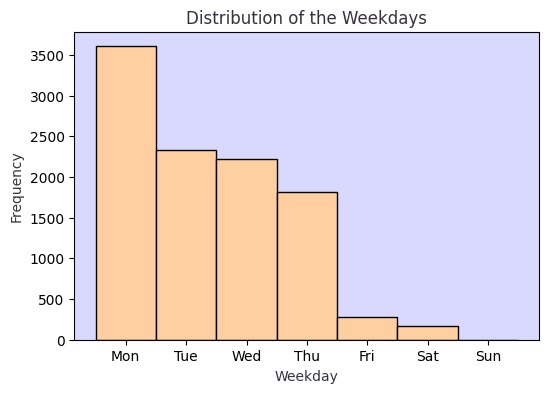

In [115]:
fig, ax = plt.subplots(figsize=(6, 4))
fig.set_facecolor("white")  #We set the colors of the axes and the figure
ax.set_facecolor("#d9d9ff")

ax.hist(dataset["WDAY"], bins=np.arange(0.5, 8.5, 1), color="#ffcfa1", edgecolor="black")

ax.set_xticks(range(1, 8))
ax.set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])  # We add a short description for each bar

ax.set_xlabel("Weekday", color="#37323E")  #We add a description for each axe
ax.set_ylabel("Frequency", color="#37323E")
ax.set_title("Distribution of the Weekdays", color="#37323E")  #We add the graph's title
plt.savefig('frequenza.png', dpi = 180, bbox_inches = 'tight')
plt.show()

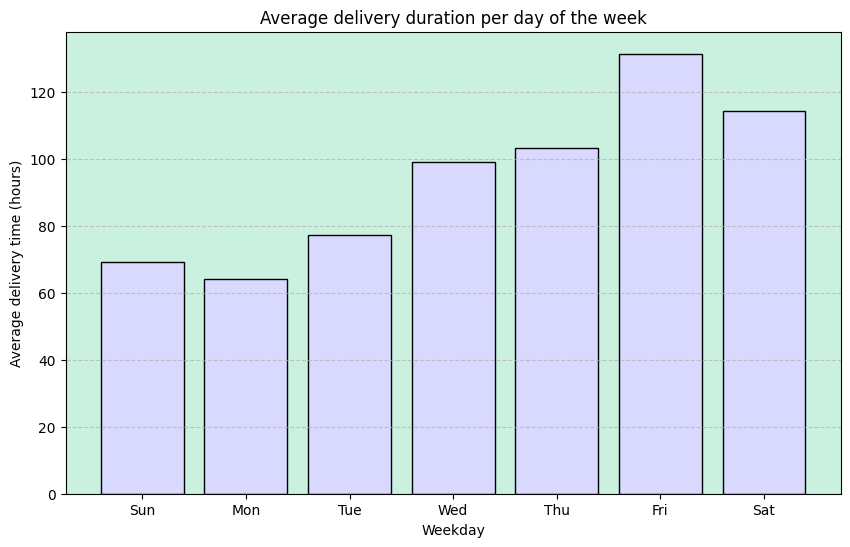

In [116]:
# Let's define the variables X and Y
X = dataset['WDAY'].values  # Weekday
Y = dataset['DELIVERY_TIME_HH'].values  # Delivery time

# We calculate the average delivery duration for each unique day
unique_days = np.unique(X)  # We get the unique days
y_means = [Y[X == day].mean() for day in unique_days]  # Average deliveries for each day

# Let's create a figure and an Axes object
fig, ax = plt.subplots(figsize=(10, 6))

# Let's create the histogram using ax
ax.bar(unique_days, y_means, color='#d9d9ff', edgecolor='black')

# Labels and title
ax.set_facecolor("#caf1df")
ax.set_title("Average delivery duration per day of the week")
ax.set_xlabel("Weekday")
ax.set_ylabel("Average delivery time (hours)")

# List of days of the week
days_of_week = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

# Let's set the labels for the X axis
ax.set_xticks(unique_days)
ax.set_xticklabels([days_of_week[day-1] for day in unique_days])  # Let's map the numbers to the days of the week

# Let's add the grid on the Y axis
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('settimana.png', dpi = 180, bbox_inches = 'tight')
# Let's show the graph
plt.show()

## Creation of aerogram for Distribution of Departures by Country of Origin and Destination


IT_count: 12084, US_count: 2223, ITUS_count: 569, USIT_count: 0
Generating pie chart...


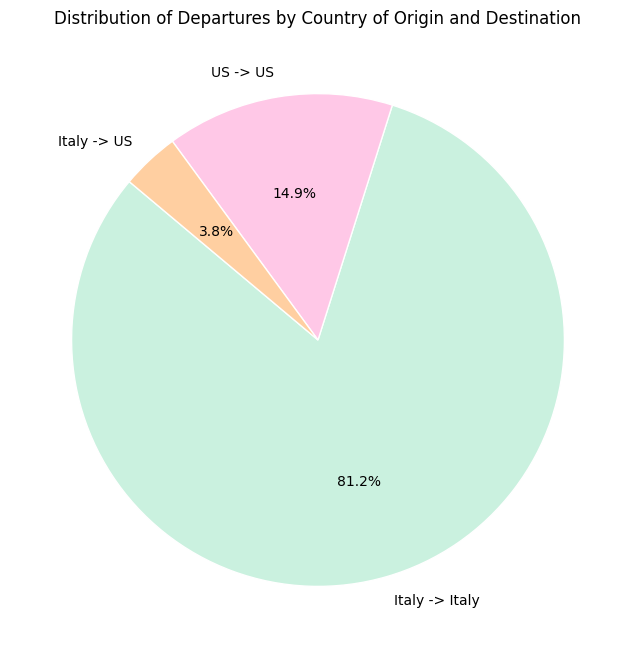

In [117]:
# Check if clean_dataset exists
if 'dataset' not in globals():
    print("Error: 'clean_dataset' is not defined. Load the dataset before running this script.")
else:
    # Check if required columns exist
    required_columns = ['DEPARTURE_COUNTRY', 'ARRIVAL_COUNTRY']
    missing_columns = [col for col in required_columns if col not in dataset.columns]
    
    if missing_columns:
        print(f"Error: Missing required columns: {missing_columns}")
    else:
        # Drop rows with missing values in key columns
        dataset = dataset.dropna(subset=required_columns)

        # Convert columns to string type to avoid filtering issues
        dataset['DEPARTURE_COUNTRY'] = dataset['DEPARTURE_COUNTRY'].astype(str)
        dataset['ARRIVAL_COUNTRY'] = dataset['ARRIVAL_COUNTRY'].astype(str)

        # Filter the dataset based on departure and arrival countries
        IT = dataset[dataset['DEPARTURE_COUNTRY'] == 'IT']
        US = dataset[dataset['DEPARTURE_COUNTRY'] == 'US']
        ITUS = dataset[(dataset['DEPARTURE_COUNTRY'] == 'IT') & (dataset['ARRIVAL_COUNTRY'] == 'US')]
        USIT = dataset[(dataset['DEPARTURE_COUNTRY'] == 'US') & (dataset['ARRIVAL_COUNTRY'] == 'IT')]

        # Compute the number of departures per category
        IT_count = len(IT)
        US_count = len(US)
        ITUS_count = len(ITUS)
        USIT_count = len(USIT)

        # Debugging: Print counts to ensure data is available
        print(f"IT_count: {IT_count}, US_count: {US_count}, ITUS_count: {ITUS_count}, USIT_count: {USIT_count}")

        # Create the pie chart only if there is data
        sizes = [IT_count, US_count, ITUS_count]
        labels = ['Italy -> Italy', 'US -> US', 'Italy -> US']
        colors = ['#caf1df', '#ffc8e7', '#ffcfa1']

        if sum(sizes) == 0:
            print("No data available for the selected categories.")
        else:
            print("Generating pie chart...")  # Debugging message

            # Force interactive mode in case the figure does not show
            plt.figure(figsize=(8, 8))
            plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'white'})
            plt.title("Distribution of Departures by Country of Origin and Destination")
            
            # Show the plot
            plt.savefig('torta.png', dpi = 180, bbox_inches = 'tight')
            plt.show(block=True)

In [118]:
clean_dataset = pd.read_csv("cleaned_dataset.csv")

In [119]:
dataset = dataset.dropna()

dataset['ARRIVAL_COUNTRY'] = dataset['ARRIVAL_COUNTRY'].map({
    'IT': 0,
    'US': 1   
})

dataset['DEPARTURE_COUNTRY'] = dataset['DEPARTURE_COUNTRY'].map({
    'IT': 0,
    'US': 1   
})

dataset = dataset[dataset['DELIVERY_TIME_HH'] < 1250]

R^2 Score: 0.19521197102889765


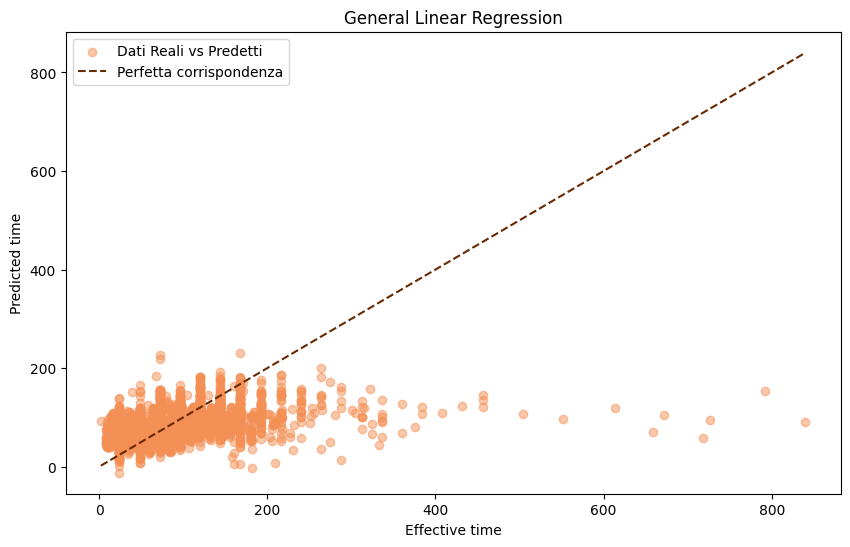

In [130]:
# Importare le librerie necessarie
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Selezionare le feature e la variabile target
X = dataset[['VEHICLETYPE', 'NET_WEIGHT_KG', 'DECLARED_DISTANCE_KM', 'SERVICETYPE', 'WDAY', 'ARRIVAL_COUNTRY', 'DEPARTURE_COUNTRY']]
y = dataset['DELIVERY_TIME_HH']  # La variabile target è l'altezza del figlio

# Dividere il dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creare il modello di regressione lineare
model = LinearRegression()
model.fit(X_train, y_train)

# Fare predizioni sul test set
y_pred = model.predict(X_test)


print("R^2 Score:", r2_score(y_test, y_pred))

# Visualizzare i risultati (grafico)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='#f49055', alpha=0.5, label="Dati Reali vs Predetti")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#692900', linestyle='--', label="Perfetta corrispondenza")
plt.xlabel("Effective time")
plt.ylabel("Predicted time")
plt.title("General Linear Regression")
plt.legend()
plt.savefig('generalRegression.png', dpi = 180, bbox_inches = 'tight')
plt.show()

The score of the regression is low, so we decided to split the dataset 

In [131]:
dataItIt = dataset[(dataset['DEPARTURE_COUNTRY'] == 0) & (dataset['ARRIVAL_COUNTRY'] == 0 )]
dataItIt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11513 entries, 0 to 14304
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            11513 non-null  int64  
 1   SERVICETYPE           11513 non-null  int64  
 2   VEHICLETYPE           11513 non-null  int64  
 3   DEPARTURE_COUNTRY     11513 non-null  int64  
 4   DEPARTURE_ZIPCODE     11513 non-null  int64  
 5   ARRIVAL_COUNTRY       11513 non-null  int64  
 6   ARRIVAL_ZIPCODE       11513 non-null  int64  
 7   SHIPPING_DATE         11513 non-null  object 
 8   GROSS_WEIGHT_KG       11513 non-null  float64
 9   NET_WEIGHT_KG         11513 non-null  float64
 10  VOLUME_M3             11513 non-null  float64
 11  DECLARED_DISTANCE_KM  11513 non-null  float64
 12  ACTUAL_DELIVERY_DATE  11513 non-null  object 
 13  DELIVERY_TIME_HH      11513 non-null  int64  
 14  WDAY                  11513 non-null  int64  
dtypes: float64(4), int64(9),

In [132]:
dataUsUs = dataset[(dataset['DEPARTURE_COUNTRY'] == 1) & (dataset['ARRIVAL_COUNTRY'] == 1)]
dataUsUs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2220 entries, 27 to 14306
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2220 non-null   int64  
 1   SERVICETYPE           2220 non-null   int64  
 2   VEHICLETYPE           2220 non-null   int64  
 3   DEPARTURE_COUNTRY     2220 non-null   int64  
 4   DEPARTURE_ZIPCODE     2220 non-null   int64  
 5   ARRIVAL_COUNTRY       2220 non-null   int64  
 6   ARRIVAL_ZIPCODE       2220 non-null   int64  
 7   SHIPPING_DATE         2220 non-null   object 
 8   GROSS_WEIGHT_KG       2220 non-null   float64
 9   NET_WEIGHT_KG         2220 non-null   float64
 10  VOLUME_M3             2220 non-null   float64
 11  DECLARED_DISTANCE_KM  2220 non-null   float64
 12  ACTUAL_DELIVERY_DATE  2220 non-null   object 
 13  DELIVERY_TIME_HH      2220 non-null   int64  
 14  WDAY                  2220 non-null   int64  
dtypes: float64(4), int64(9),

In [133]:
dataItUs = dataset[(dataset['DEPARTURE_COUNTRY'] == 0) & (dataset['ARRIVAL_COUNTRY'] == 1)]
dataItUs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 234 to 14039
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            569 non-null    int64  
 1   SERVICETYPE           569 non-null    int64  
 2   VEHICLETYPE           569 non-null    int64  
 3   DEPARTURE_COUNTRY     569 non-null    int64  
 4   DEPARTURE_ZIPCODE     569 non-null    int64  
 5   ARRIVAL_COUNTRY       569 non-null    int64  
 6   ARRIVAL_ZIPCODE       569 non-null    int64  
 7   SHIPPING_DATE         569 non-null    object 
 8   GROSS_WEIGHT_KG       569 non-null    float64
 9   NET_WEIGHT_KG         569 non-null    float64
 10  VOLUME_M3             569 non-null    float64
 11  DECLARED_DISTANCE_KM  569 non-null    float64
 12  ACTUAL_DELIVERY_DATE  569 non-null    object 
 13  DELIVERY_TIME_HH      569 non-null    int64  
 14  WDAY                  569 non-null    int64  
dtypes: float64(4), int64(9),

R^2 Score: 0.20921194697029422


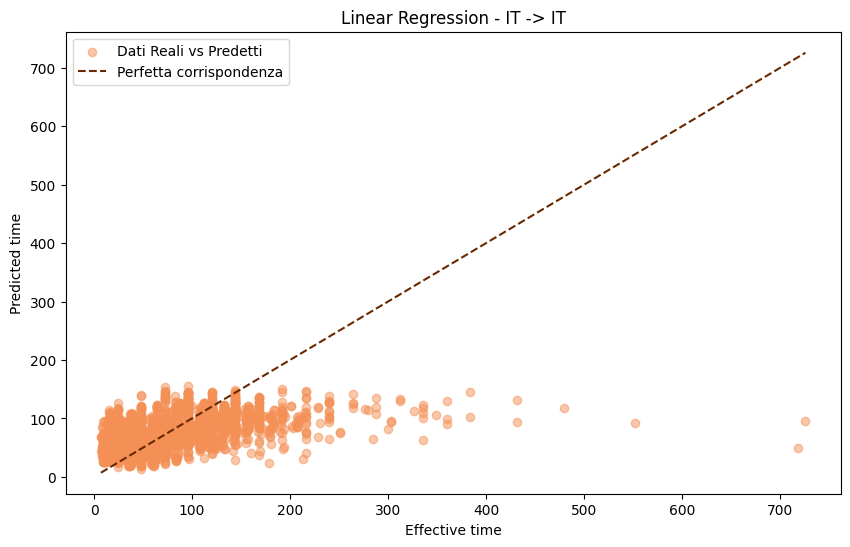

In [134]:
# Importare le librerie necessarie
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Selezionare le feature e la variabile target
X = dataItIt[['VEHICLETYPE', 'NET_WEIGHT_KG', 'DECLARED_DISTANCE_KM', 'SERVICETYPE', 'WDAY']]
y = dataItIt['DELIVERY_TIME_HH']  # La variabile target è l'altezza del figlio

# Dividere il dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creare il modello di regressione lineare
model = LinearRegression()
model.fit(X_train, y_train)

# Fare predizioni sul test set
y_pred = model.predict(X_test)


print("R^2 Score:", r2_score(y_test, y_pred))

# Visualizzare i risultati (grafico)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='#f49055', alpha=0.5, label="Dati Reali vs Predetti")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#692900', linestyle='--', label="Perfetta corrispondenza")
plt.xlabel("Effective time")
plt.ylabel("Predicted time")
plt.title("Linear Regression - IT -> IT")
plt.legend()
plt.savefig('itit.png', dpi = 180, bbox_inches = 'tight')
plt.show()

R^2 Score: 0.7051169506197394


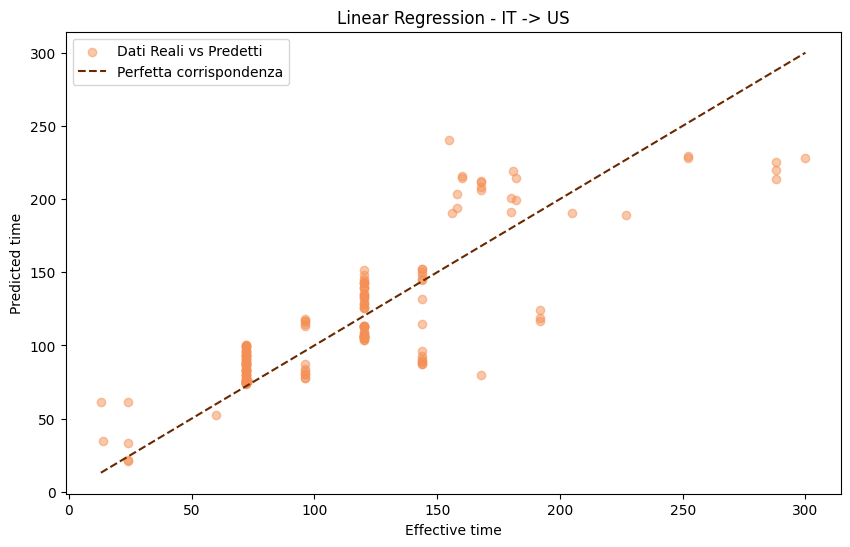

In [135]:
# Importare le librerie necessarie
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Selezionare le feature e la variabile target
X = dataItUs[['VEHICLETYPE', 'NET_WEIGHT_KG', 'DECLARED_DISTANCE_KM', 'SERVICETYPE', 'WDAY']]
y = dataItUs['DELIVERY_TIME_HH']  # La variabile target è l'altezza del figlio

# Dividere il dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creare il modello di regressione lineare
model = LinearRegression()
model.fit(X_train, y_train)

# Fare predizioni sul test set
y_pred = model.predict(X_test)


print("R^2 Score:", r2_score(y_test, y_pred))

# Visualizzare i risultati (grafico)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='#f49055', alpha=0.5, label="Dati Reali vs Predetti")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#692900', linestyle='--', label="Perfetta corrispondenza")
plt.xlabel("Effective time")
plt.ylabel("Predicted time")
plt.title("Linear Regression - IT -> US")
plt.legend()
plt.savefig('itus.png', dpi = 180, bbox_inches = 'tight')
plt.show()

R^2 Score: 0.3172343995747128


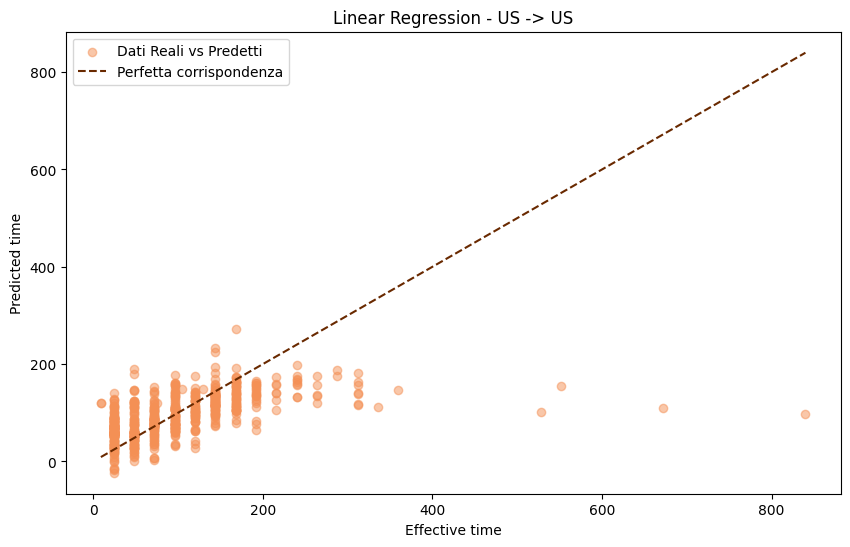

In [136]:
# Importare le librerie necessarie
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Selezionare le feature e la variabile target
X = dataUsUs[['VEHICLETYPE', 'NET_WEIGHT_KG', 'DECLARED_DISTANCE_KM', 'SERVICETYPE', 'WDAY']]
y = dataUsUs['DELIVERY_TIME_HH']  # La variabile target è l'altezza del figlio

# Dividere il dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creare il modello di regressione lineare
model = LinearRegression()
model.fit(X_train, y_train)

# Fare predizioni sul test set
y_pred = model.predict(X_test)


print("R^2 Score:", r2_score(y_test, y_pred))

# Visualizzare i risultati (grafico)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='#f49055', alpha=0.5, label="Dati Reali vs Predetti")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#692900', linestyle='--', label="Perfetta corrispondenza")
plt.xlabel("Effective time")
plt.ylabel("Predicted time")
plt.title("Linear Regression - US -> US")
plt.legend()

plt.savefig('usus.png', dpi = 180, bbox_inches = 'tight')

plt.show()